# Aufgabe 4: Preprocessing and Pipelines 

In this task we build a pipeline which performs the typical data preprocessing combined with a classification.

In [2]:
# imports
import pandas
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

a) We load the breast cancer data set. 

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
dataset = pandas.read_csv(url)

b) We split the data into features X and labels y. After that we transform the binary labels to numerical values.

In [4]:
array = dataset.values
X = array[:,[0] + list(range(2,32))]
# transform binary labels to numerical values
# benign -> 0, malignant -> 1
le = LabelEncoder()
le.fit(["M", "B"])
y = le.transform(array[:,1]) 

c) Next we split the data into a training and a validation set.

In [5]:
random_state = 1 
test_size = 0.20
train_size = 0.80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    train_size=train_size, random_state=random_state)

d) Now we set up and train a pipeline which contains a scaler, dimensionality reduction and a classificator. 

In [6]:
scaler = StandardScaler()
pca = PCA(n_components=2)
logistic = LogisticRegression(random_state=1)
pipeline = Pipeline(steps=[('StandardScaler', scaler), ('PCA', pca),
                           ('LogisticRegression', logistic)])
pipeline.fit(X_train, y_train)

/gpfs/software/x86_64/anaconda/envs/jupyterhub/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/gpfs/software/x86_64/anaconda/envs/jupyterhub/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, n_components=2, whiten=False)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

e) Now we evaluate the score of our pipeline.

In [7]:
accuracy = pipeline.score(X_test, y_test)
print("Pipelines reaches with PCA an accuracy of:", accuracy)

Pipelines reaches with PCA an accuracy of: 0.956140350877


/gpfs/software/x86_64/anaconda/envs/jupyterhub/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f) Now we use RFE instead of PCA for feature selection. 

In [8]:
# set up and train pipeline with RFE
scaler = StandardScaler()
logistic = LogisticRegression(random_state=1)
rfe = RFECV(logistic, scoring='accuracy')
pipeline = Pipeline(steps=[('StandardScaler', scaler), ('rfe', rfe),
                           ('LogisticRegression', logistic)])
pipeline.fit(X_train, y_train)

/gpfs/software/x86_64/anaconda/envs/jupyterhub/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/gpfs/software/x86_64/anaconda/envs/jupyterhub/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfe', RFECV(cv=None,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', rand...nalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

And look at our findings.

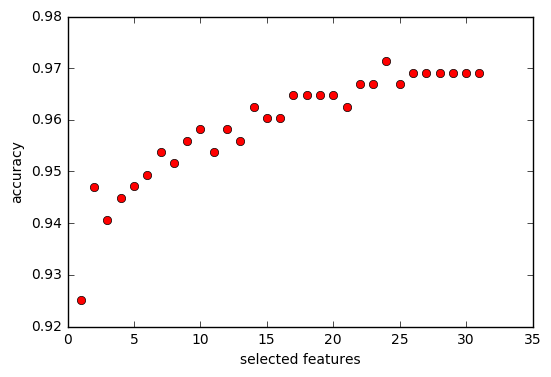

Highest accuracy is achieved with: 24 features

From the given 31 features numbered from 0 to 30 these are:
1
2
4
6
7
8
10
11
12
13
14
16
18
19
20
21
22
23
24
25
27
28
29
30

The pipeline reaches with RFE a maximum accuracy of: 0.991228070175


/gpfs/software/x86_64/anaconda/envs/jupyterhub/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_, "ro")
plt.xlabel("selected features")
plt.ylabel("accuracy")
plt.show()
print("Highest accuracy is achieved with:", rfe.n_features_, "features")
print()
print("From the given 31 features numbered from 0 to 30 these are:")
i = 0
while i < len(rfe.support_):
    if rfe.support_[i]:
        print(i)
    i += 1
print()
accuracy = pipeline.score(X_test, y_test)
print("The pipeline reaches with RFE a maximum accuracy of:", accuracy)